<a href="https://colab.research.google.com/github/lorenzorossi0069/LearnPython/blob/master/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Definizioni e crezione dati

In [120]:
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.cm as cm  #colormap
%matplotlib inline

#from numpy.random  import random 
#from numpy.random import seed 
np.random.seed(10)

In [ ]:
'''#cmap reference: https://matplotlib.org/examples/color/colormaps_reference.html

#from sklearn.datasets import make_blobs


X, y = make_blobs(n_samples=1500, centers=3,
                  n_features=2, random_state=800)
centroids = [[-6,2],[3,-4],[-5,10]]

plt.scatter(X[:, 0], X[:, 1], c=4+y,s=50, cmap='tab20b')'''

In [121]:
#all data
X=[]
Y=[]
# clusters (list of lists)
clusters_X=[]
clusters_Y=[]
clusters_classification=[]

In [122]:
def generateData(numPoints):
  return(np.random.random(numPoints),np.random.random(numPoints))

def generateCentroids(num_K):
  #create num_K random centroids
  return (np.random.random(num_K), np.random.random(num_K))

def SearchCluster(X,Y,XK,YK):
  global clusters_classification
  clusters_classification=[]
  #first, let us define num_K empty cluster
  global clusters_X
  global clusters_Y
  clusters_X=[]
  clusters_Y=[]
  for c in range(len(XK)):
    clusters_X.append([])
    clusters_Y.append([])

  for xi,yi in zip(X, Y):
    distanza=[]
    for k in range(len(XK)):
      dx=(xi-XK[k])
      dy=(yi-YK[k])
      distanza.append(np.sqrt(dx**2+dy**2))

    #print('distanza = '+str(distanza))
    # scelgo minima distanza 
    cluster_id = np.argmin(distanza)
    clusters_classification.append(cluster_id)
    #print('cluster_id = '+str(cluster_id))
    clusters_X[cluster_id].append(xi)
    clusters_Y[cluster_id].append(yi)
    #print(clusters_X[cluster_id],clusters_Y[cluster_id])

  #print(len(clusters_X))

#Random centroids

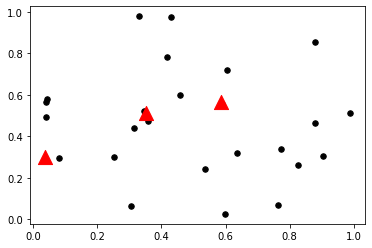

In [137]:
#first (random) centroids
X,Y=generateData(25)
XK,YK = generateCentroids(3)

fig,ax= plt.subplots(1,1)
ax.scatter(X, Y, s=30,c='black')
ax.scatter(XK, YK, s=200,c='red', marker='^')


[0, 1, 2]


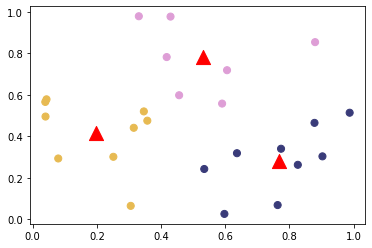

In [146]:
SearchCluster(X,Y,XK,YK)

fig,ax= plt.subplots(1,1)
ax.scatter(XK, YK, s=200,c='red', marker='^')

#ricalcolo nuovi centroidi come baricentro dei cluster appena trovati
for i in range(len(clusters_X)):
  XK[i]=np.average(clusters_X[i])
  YK[i]=np.average(clusters_Y[i])

'''ax.scatter(clusters_X[0], clusters_Y[0], s=30,c='red',marker='o')
ax.scatter(clusters_X[1], clusters_Y[1], s=30,c='blue',marker='o')
ax.scatter(clusters_X[2], clusters_Y[2], s=30,c='green',marker='o')  '''

c= list(range(len(XK)))
print(c)
ax.scatter(X, Y, c=clusters_classification,s=50, cmap='tab20b')